In [1]:
%matplotlib inline
import matplotlib as mpl 
mpl.rcParams['figure.dpi'] = 100

from pandas import Grouper
from pandas import Series
from statsmodels.tsa.stattools import adfuller

from pandas import read_csv
from pandas import DataFrame
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.arima.model import ARIMAResults
from math import sqrt
from matplotlib import pyplot

from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

import numpy as np
import warnings

import pandas as pd
import datetime
import matplotlib.pyplot as plt

Dataset 1163, Validation 300
             Volume
count  1.464000e+03
mean   1.020549e+08
std    6.088999e+07
min    0.000000e+00
25%    6.425775e+07
50%    8.883140e+07
75%    1.255830e+08
max    7.702524e+08


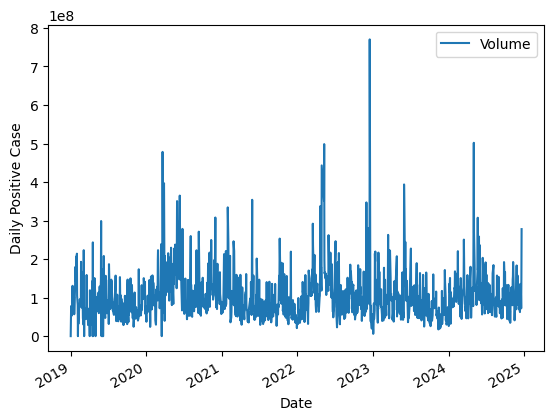

In [2]:
# separate out a validation dataset
from pandas import read_csv
series = read_csv('../../Dataset/BMRI_Volume.csv', header=0, index_col=0, parse_dates=True)
end = 1
# volume = series['Volume']

split_point = len(series) - (300 + end)
dataset, validation = series[0:split_point], series[split_point:-end]
print('Dataset %d, Validation %d' % (len(dataset), len(validation)))
dataset.to_csv('dataset.csv', header=False)
validation.to_csv('validation.csv', header=False)

print(series.describe())
series.plot()
pyplot.ylabel("Daily Positive Case")
pyplot.show()

                  1
count  1.163000e+03
mean   1.031594e+08
std    6.293037e+07
min    0.000000e+00
25%    6.358220e+07
50%    8.939740e+07
75%    1.282444e+08
max    7.702524e+08


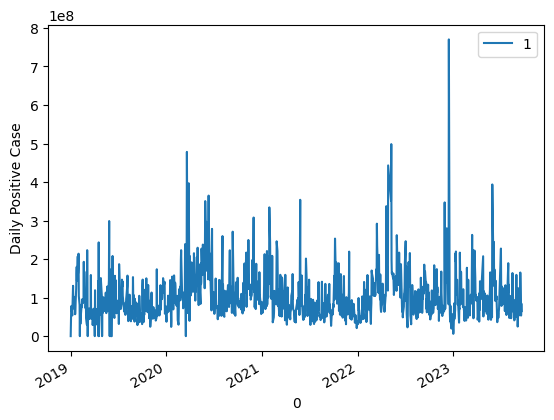

In [3]:
# line plots of time series
from pandas import read_csv
from matplotlib import pyplot
series = read_csv('dataset.csv', header=None, index_col=0, parse_dates=True)
print(series.describe())
series.plot()
pyplot.ylabel("Daily Positive Case")
pyplot.show()

                  1
count  3.000000e+02
mean   9.718741e+07
std    5.117375e+07
min    1.744460e+07
25%    6.602312e+07
50%    8.652505e+07
75%    1.173025e+08
max    5.018493e+08


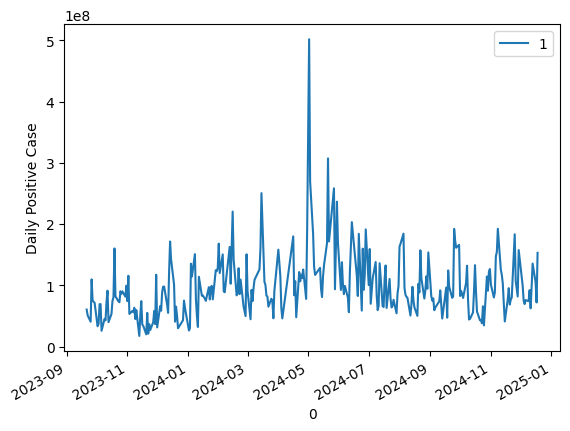

In [4]:
# line plots of time series
from pandas import read_csv
from matplotlib import pyplot
valid = read_csv('validation.csv', header=None, index_col=0, parse_dates=True)
print(valid.describe())
valid.plot()
pyplot.ylabel("Daily Positive Case")
pyplot.show()

C:\Users\akhda\AppData\Local\Temp\ipykernel_12780\2594613765.py:8: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  pyplot.subplot(212)


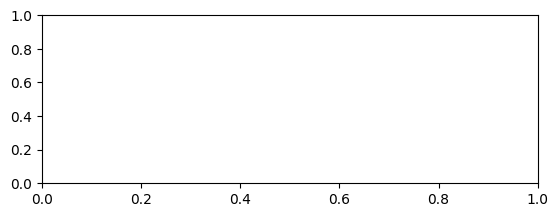

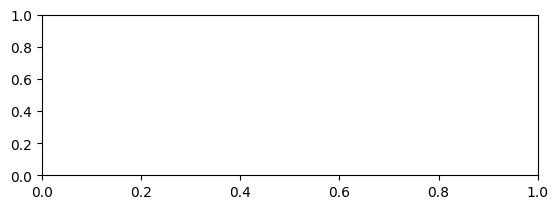

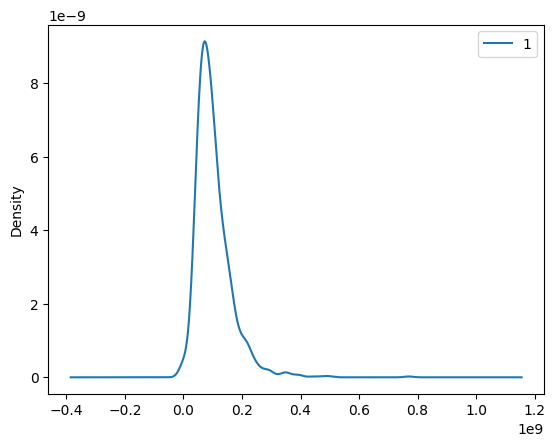

In [5]:
# density plots of time series
from pandas import read_csv
from matplotlib import pyplot
# series = read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
pyplot.figure(1)
pyplot.subplot(211)
series.hist()
pyplot.subplot(212)
series.plot(kind='kde')
pyplot.show()

In [6]:
# grid search ARIMA parameters for time series

# evaluate an ARIMA model for a given order (p,d,q) and return RMSE
def evaluate_arima_model(X, arima_order):
    # prepare training dataset
    X = X.astype('float32')
    train_size = int(len(X) * 0.50)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
    # make predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit()
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
    # calculate out of sample error
    rmse = sqrt(mean_squared_error(test, predictions))
    return rmse

# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    list_cfg = []
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse = evaluate_arima_model(dataset, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                        list_cfg.append([best_cfg,best_score])
                    print('ARIMA%s RMSE=%.3f' % (order,rmse))
                except:
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))
    return list_cfg


In [7]:
# # grid search ARIMA parameters for time series
# # load dataset
# # series = read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
# # evaluate parameters
# p_values = range(1, 5)
# d_values = [1]
# q_values = range(1, 5)
# warnings.filterwarnings("ignore")

# list_order = evaluate_models(series.values, p_values, d_values, q_values)

In [8]:
# evaluate persistence model on time series
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from math import sqrt
# load data
# series = read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
# prepare data
X = series.values
X = X.astype('float32')
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]
# walk-forward validation
history = [x for x in train]
predictions = list()
for i in range(len(test)):
    # predict
    yhat = history[-1]
    predictions.append(yhat)
    # observation
    obs = test[i]
    history.append(obs)
#     print('>Predicted=%.3f, Expected=%3.f' % (yhat, obs))
# report performance
rmse = sqrt(mean_squared_error(test, predictions))
print('RMSE: %.3f' % rmse)

RMSE: 70242352.605


In [9]:
# tentukan model
# print(list_order)
# ARIMA_order = list_order[-1][0]
# print(ARIMA_order)
ARIMA_order = (1, 1, 1)
# print(ARIMA_order)

In [10]:
# evaluate grid search configured ARIMA model

# load data
# series = read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
# prepare data
X = series.values
X = X.astype('float32')
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]
# walk-forward validation
history = [x for x in train]
predictions = list()
for i in range(len(test)):
    # predict
    model = ARIMA(history, order=ARIMA_order)
    model_fit = model.fit()
    yhat = model_fit.forecast()[0]
    predictions.append(yhat)
    # observation
    obs = test[i]
    history.append(obs)
#     print('>Predicted=%.3f, Expected=%.3f' % (yhat, obs))
# report performance
rmse = sqrt(mean_squared_error(test, predictions))
print('RMSE: %.3f' % rmse)

RMSE: 59200319.397


                  0
count  5.820000e+02
mean  -5.360698e+05
std    5.924882e+07
min   -2.657997e+08
25%   -3.164079e+07
50%   -1.020070e+07
75%    1.786604e+07
max    6.374833e+08


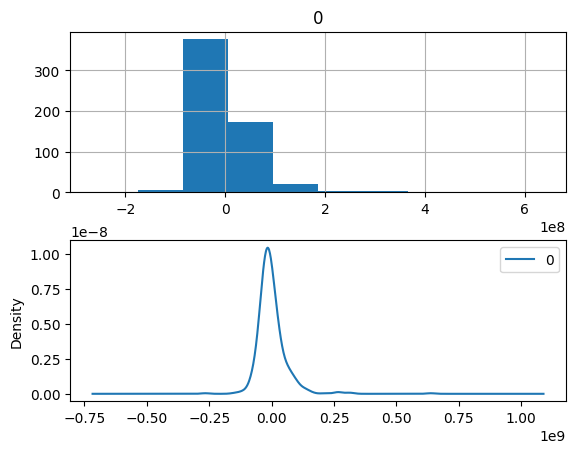

In [11]:
# summarize ARIMA forecast residuals

# load data
# series = read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
# prepare data
X = series.values
X = X.astype('float32')
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]
# walk-forward validation
history = [x for x in train]
predictions = list()
for i in range(len(test)):
    # predict
    model = ARIMA(history, order=ARIMA_order)
    model_fit = model.fit()
    yhat = model_fit.forecast()[0]
    predictions.append(yhat)
    # observation
    obs = test[i]
    history.append(obs)
    # errors
residuals = [test[i]-predictions[i] for i in range(len(test))]
residuals = DataFrame(residuals)
print(residuals.describe())
# plot
pyplot.figure()
pyplot.subplot(211)
residuals.hist(ax=pyplot.gca())
pyplot.subplot(212)
residuals.plot(kind='kde', ax=pyplot.gca())
pyplot.show()

In [12]:
resi_bias = residuals.describe()[0][1]
print(residuals.describe()[0][1])

-536069.75


RMSE: 59197892.241
                  0
count  5.820000e+02
mean   1.099656e-01
std    5.924882e+07
min   -2.652636e+08
25%   -3.110472e+07
50%   -9.664624e+06
75%    1.840211e+07
max    6.380194e+08


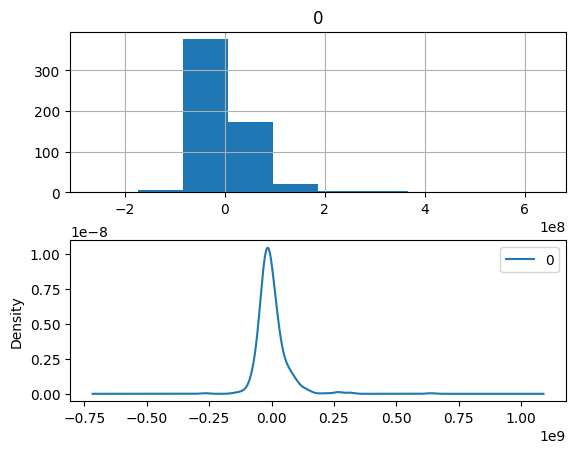

In [13]:
# plots of residual errors of bias corrected forecasts

# load data
# series = read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
# prepare data
X = series.values
X = X.astype('float32')
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]
# walk-forward validation
history = [x for x in train]
predictions = list()
bias = resi_bias
for i in range(len(test)):
    # predict
    model = ARIMA(history, order=ARIMA_order)
    model_fit = model.fit()
    yhat = model_fit.forecast()[0]
    yhat = bias + yhat
    predictions.append(yhat)
    # observation
    obs = test[i]
    history.append(obs)
# report performance
rmse = sqrt(mean_squared_error(test, predictions))
print('RMSE: %.3f' % rmse)
# errors
residuals = [test[i]-predictions[i] for i in range(len(test))]
residuals = DataFrame(residuals)
print(residuals.describe())
# plot
pyplot.figure()
pyplot.subplot(211)
residuals.hist(ax=pyplot.gca())
pyplot.subplot(212)
residuals.plot(kind='kde', ax=pyplot.gca())
pyplot.show()

RMSE: 59197892.241
                  0
count  5.820000e+02
mean   1.099656e-01
std    5.924882e+07
min   -2.652636e+08
25%   -3.110472e+07
50%   -9.664624e+06
75%    1.840211e+07
max    6.380194e+08


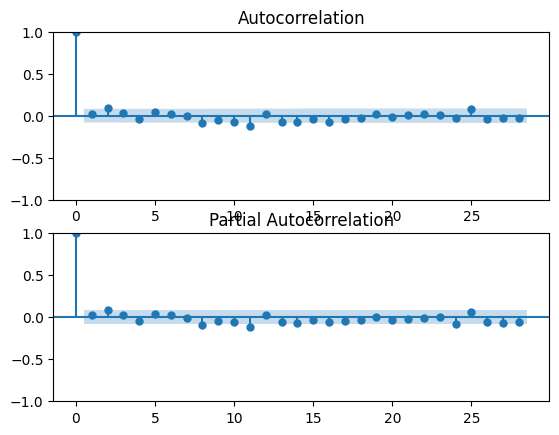

In [14]:
# ACF and PACF plots of residual errors of bias corrected forecasts

# load data
# series = read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
# prepare data
X = series.values
X = X.astype('float32')
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]
# walk-forward validation
history = [x for x in train]
predictions = list()
bias = resi_bias
for i in range(len(test)):
    # predict
    model = ARIMA(history, order=ARIMA_order)
    model_fit = model.fit()
    yhat = model_fit.forecast()[0]
    yhat = bias + yhat
    predictions.append(yhat)
    # observation
    obs = test[i]
    history.append(obs)
# report performance
rmse = sqrt(mean_squared_error(test, predictions))
print('RMSE: %.3f' % rmse)
# errors
residuals = [test[i]-predictions[i] for i in range(len(test))]
residuals = DataFrame(residuals)
print(residuals.describe())
# plot
pyplot.figure()
pyplot.subplot(211)
plot_acf(residuals, ax=pyplot.gca())
pyplot.subplot(212)
plot_pacf(residuals, ax=pyplot.gca(),method='ywm')
pyplot.show()

In [15]:
# save finalized model

# load data
# series = read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
# prepare data
X = series.values
X = X.astype('float32')
# fit model
model = ARIMA(X, order=ARIMA_order)
model_fit = model.fit()
# bias constant, could be calculated from in-sample mean residual
bias = resi_bias
# save model
model_fit.save('model.pkl')
np.save('model_bias.npy', [bias])

# load finalized model and make a prediction

In [16]:
# load finalized model and make a prediction

# series = read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
model_fit = ARIMAResults.load('model.pkl')
bias = np.load('model_bias.npy')
yhat = float(model_fit.forecast()[0])
yhat = bias + yhat
print('Predicted: %.3f' % yhat)

Predicted: 74133606.377


# try on evaluation data

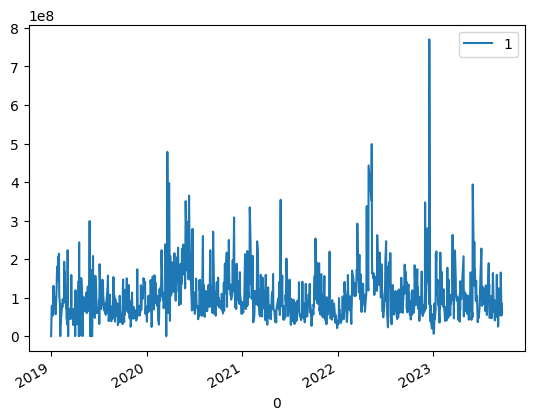

,1
0,
2019-01-01,0
2019-01-02,45319200
2019-01-03,74174000
2019-01-04,78514000
2019-01-07,53624800
...,...
2023-09-14,59132600
2023-09-15,165106200
2023-09-18,53450400


In [17]:
series.plot()
pyplot.show()
series

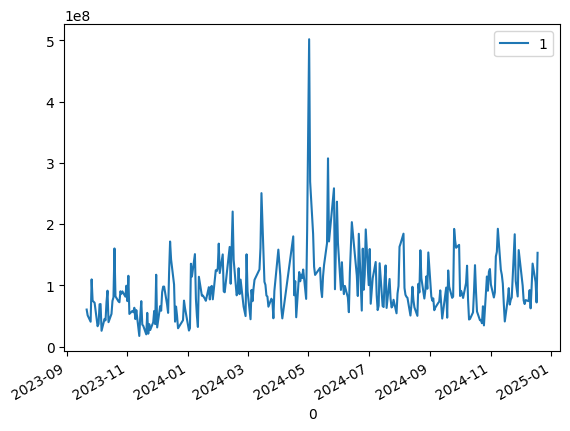

,1
0,
2023-09-21,60535000
2023-09-22,51069900
2023-09-25,40650900
2023-09-26,109786400
2023-09-27,75050600
...,...
2024-12-12,96707500
2024-12-13,135581400
2024-12-16,105375900


In [18]:
# validation = read_csv('validation.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
validation = read_csv('validation.csv', header=None, index_col=0, parse_dates=True)
validation.squeeze('columns') 
validation.plot()
pyplot.show()
validation

>Predicted=74133606.377, Expected=60535000.000
>Predicted=71866057.326, Expected=51069900.000
>Predicted=67743076.952, Expected=40650900.000
>Predicted=62832673.521, Expected=109786400.000
>Predicted=83368330.702, Expected=75050600.000
>Predicted=74322829.464, Expected=71554096.000
>Predicted=73201808.574, Expected=33296500.000
>Predicted=60561701.869, Expected=37093100.000
>Predicted=59344989.603, Expected=69154000.000
>Predicted=67784915.958, Expected=69566800.000
>Predicted=67993552.083, Expected=25913600.000
>Predicted=53854473.542, Expected=45321700.000
>Predicted=57647329.730, Expected=42820800.000
>Predicted=55678374.798, Expected=72955000.000
>Predicted=64321910.646, Expected=91341800.000
>Predicted=71059217.243, Expected=39914700.000
>Predicted=56036231.978, Expected=53416400.000
>Predicted=58955083.449, Expected=74702304.000
>Predicted=65351733.987, Expected=80637400.000
>Predicted=68068629.256, Expected=160277792.000
>Predicted=95117897.461, Expected=82132000.000
>Predicted=

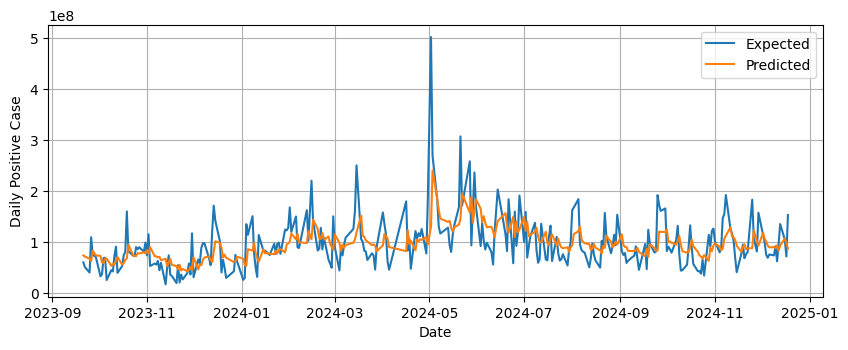

In [19]:
# load and evaluate the finalized model on the validation dataset

# load and prepare datasets
# dataset = read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
X = series.values.astype('float32')
history = [x for x in X]
# validation = read_csv('validation.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
validation = read_csv('validation.csv', header=None, index_col=0, parse_dates=True)
y = validation.values.astype('float32')
# load model
model_fit = ARIMAResults.load('model.pkl')
bias = np.load('model_bias.npy')
# make first prediction
predictions = list()
yhat = float(model_fit.forecast()[0])
yhat = bias + yhat
predictions.append(yhat)
history.append(y[0])
print('>Predicted=%.3f, Expected=%.3f' % (yhat, y[0]))
# rolling forecasts
for i in range(1, len(y)):
    # difference data
    # predict
    model = ARIMA(history, order=ARIMA_order)
    model_fit = model.fit()
    yhat = model_fit.forecast()[0]
    yhat = bias + yhat
    predictions.append(yhat)
    # observation
    obs = y[i]
    history.append(obs)
    print('>Predicted=%.3f, Expected=%.3f' % (yhat, obs))
# report performance
rmse = sqrt(mean_squared_error(y, predictions))
mae = mean_absolute_error(y, predictions)
mape = mean_absolute_percentage_error(y, predictions) *100
print('RMSE: %.3f' % rmse)
print('MAE: %.3f' % mae)
print('MAPE: %.3f' % mape)

predictions_flat = np.array(predictions).reshape(-1)
result = pd.DataFrame(np.array([y[:,0],predictions_flat]).T)
val_date = validation.reset_index().iloc[:,[0]].rename(columns={0: "date"})
result_date = pd.concat([val_date, result],axis=1).set_index('date')
plt.style.use('default')
fig = plt.figure(figsize=(10, 4))
ax0 = fig.add_subplot(111)
ax0.plot(result_date)
ax0.grid()
fig.autofmt_xdate(rotation=0, ha='center')
ax0.set_xlabel('Date')
ax0.set_ylabel('Daily Positive Case')
ax0.legend(['Expected', 'Predicted'])
plt.show()

In [20]:
validation

,1
0,
2023-09-21,60535000
2023-09-22,51069900
2023-09-25,40650900
2023-09-26,109786400
2023-09-27,75050600
...,...
2024-12-12,96707500
2024-12-13,135581400
2024-12-16,105375900


In [21]:
y[:,0].shape

(300,)

In [22]:
predictions_flat.shape

(300,)

>Predicted=64864900.000, Expected=60535000
>Predicted=60535000.000, Expected=51069900
>Predicted=51069900.000, Expected=40650900
>Predicted=40650900.000, Expected=109786400
>Predicted=109786400.000, Expected=75050600
>Predicted=75050600.000, Expected=71554096
>Predicted=71554096.000, Expected=33296500
>Predicted=33296500.000, Expected=37093100
>Predicted=37093100.000, Expected=69154000
>Predicted=69154000.000, Expected=69566800
>Predicted=69566800.000, Expected=25913600
>Predicted=25913600.000, Expected=45321700
>Predicted=45321700.000, Expected=42820800
>Predicted=42820800.000, Expected=72955000
>Predicted=72955000.000, Expected=91341800
>Predicted=91341800.000, Expected=39914700
>Predicted=39914700.000, Expected=53416400
>Predicted=53416400.000, Expected=74702304
>Predicted=74702304.000, Expected=80637400
>Predicted=80637400.000, Expected=160277792
>Predicted=160277792.000, Expected=82132000
>Predicted=82132000.000, Expected=73897504
>Predicted=73897504.000, Expected=72469200
>Predic

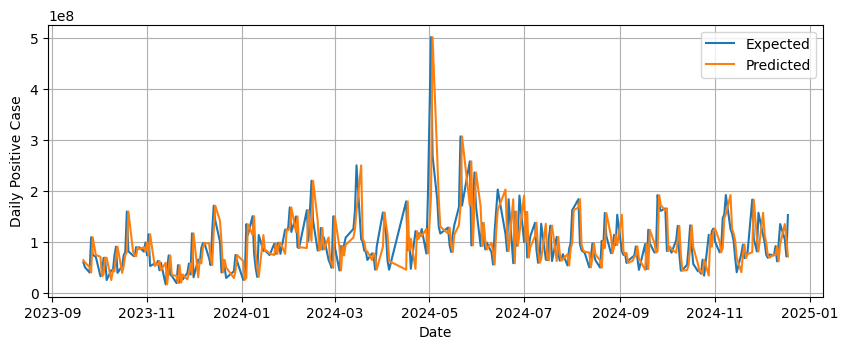

In [23]:
# evaluate persistence model on time series
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from math import sqrt
# prepare data
train = X

# load and prepare datasets
y = validation.values.astype('float32') # ambil dari cell sebelumnya no 15

# walk-forward validation
history = [x for x in train]
predictions = list()
for i in range(len(y)):
    # predict
    yhat = history[-1]
    predictions.append(yhat)
    # observation
    obs = y[i]
    history.append(obs)
    print('>Predicted=%.3f, Expected=%3.f' % (yhat, obs))

# report performance
rmse = sqrt(mean_squared_error(y, predictions))
mae = mean_absolute_error(y, predictions)
mape = mean_absolute_percentage_error(y, predictions)*100
print('RMSE: %.3f' % rmse)
print('MAE: %.3f' % mae)
print('MAPE: %.3f' % mape)

predictions_flat = np.array(predictions).reshape(-1)
result = pd.DataFrame(np.array([y[:,0],predictions_flat]).T)
val_date = validation.reset_index().iloc[:,[0]].rename(columns={0: "date"})
result_date = pd.concat([val_date, result],axis=1).set_index('date')
plt.style.use('default')
fig = plt.figure(figsize=(10, 4))
ax0 = fig.add_subplot(111)
ax0.plot(result_date)
ax0.grid()
fig.autofmt_xdate(rotation=0, ha='center')
ax0.set_xlabel('Date')
ax0.set_ylabel('Daily Positive Case')
ax0.legend(['Expected', 'Predicted'])
plt.show()

# try on test data

                  0
count  7.320000e+02
mean   2.581480e+05
std    5.669970e+07
min   -2.657997e+08
25%   -3.101016e+07
50%   -7.866480e+06
75%    1.840881e+07
max    6.374833e+08


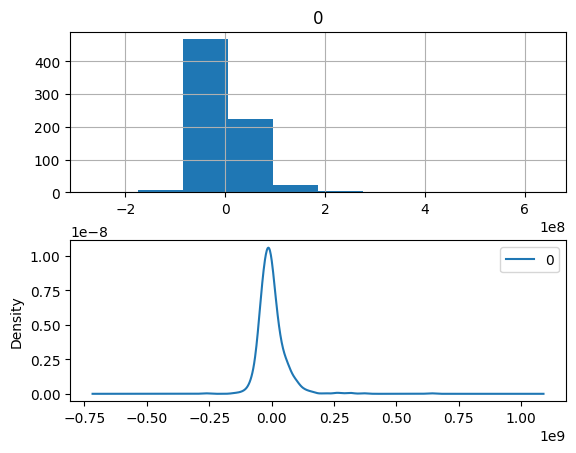

258147.984375


In [24]:
# find new residual on new training data

# load data
series = read_csv('../../Dataset/BMRI_Volume.csv', header=0, index_col=0, parse_dates=True)
end = 1
# volume = series['Volume']

split_point = len(series) - end
dataset, validation = series[0:split_point], series[split_point:]
X = dataset.values.astype('float32')
X = series.values
X = X.astype('float32')
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]
# walk-forward validation
history = [x for x in train]
predictions = list()
for i in range(len(test)):
    # predict
    model = ARIMA(history, order=ARIMA_order)
    model_fit = model.fit()
    yhat = model_fit.forecast()[0]
    predictions.append(yhat)
    # observation
    obs = test[i]
    history.append(obs)
    # errors
residuals = [test[i]-predictions[i] for i in range(len(test))]
residuals = DataFrame(residuals)
print(residuals.describe())
# plot
pyplot.figure()
pyplot.subplot(211)
residuals.hist(ax=pyplot.gca())
pyplot.subplot(212)
residuals.plot(kind='kde', ax=pyplot.gca())
pyplot.show()

resi_bias = residuals.describe()[0][1]
print(residuals.describe()[0][1])

In [25]:
# save finalized model

# load data
series = read_csv('../../Dataset/BMRI_Volume.csv', header=0, index_col=0, parse_dates=True)
end = 300 # sesuaikan dengan split point di awal code
# volume = series['Volume']

split_point = len(series) - end
dataset, validation = series[0:split_point], series[split_point:]
X = dataset.values.astype('float32')
history = [x for x in X]

# difference data
# fit model
model = ARIMA(history, order=ARIMA_order)
model_fit = model.fit()
# bias constant, could be calculated from in-sample mean residual
bias = resi_bias
# save model
model_fit.save('model.pkl')
np.save('model_bias.npy', [bias])

>Predicted=72660275.060, Expected=51069900.000
>Predicted=68537294.686, Expected=40650900.000
>Predicted=63626891.256, Expected=109786400.000
>Predicted=84162548.437, Expected=75050600.000
>Predicted=75117047.199, Expected=71554096.000
>Predicted=73996026.309, Expected=33296500.000
>Predicted=61355919.603, Expected=37093100.000
>Predicted=60139207.337, Expected=69154000.000
>Predicted=68579133.692, Expected=69566800.000
>Predicted=68787769.817, Expected=25913600.000
>Predicted=54648691.276, Expected=45321700.000
>Predicted=58441547.464, Expected=42820800.000
>Predicted=56472592.532, Expected=72955000.000
>Predicted=65116128.380, Expected=91341800.000
>Predicted=71853434.977, Expected=39914700.000
>Predicted=56830449.712, Expected=53416400.000
>Predicted=59749301.183, Expected=74702304.000
>Predicted=66145951.722, Expected=80637400.000
>Predicted=68862846.991, Expected=160277792.000
>Predicted=95912115.196, Expected=82132000.000
>Predicted=76073588.825, Expected=73897504.000
>Predicted=

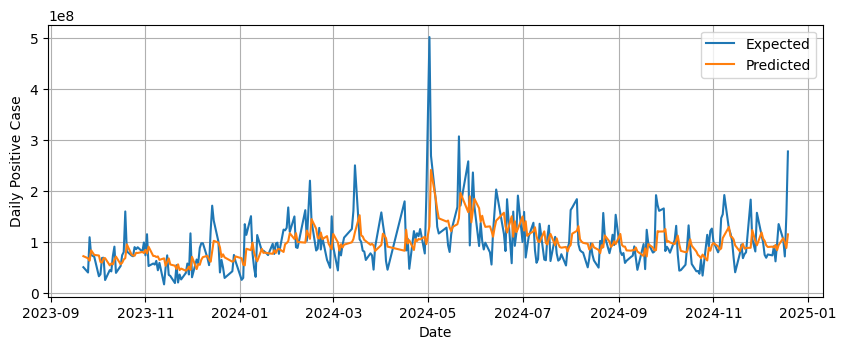

In [26]:
# load and evaluate the finalized model on the validation dataset

# load and prepare datasets
y = validation.values.astype('float32') # ambil dari cell sebelumnya no 15

# load model
model_fit = ARIMAResults.load('model.pkl')
bias = np.load('model_bias.npy')
# make first prediction
predictions = list()
yhat = float(model_fit.forecast()[0])
yhat = bias + yhat
predictions.append(yhat)
history.append(y[0])
print('>Predicted=%.3f, Expected=%.3f' % (yhat, y[0]))
# rolling forecasts
for i in range(1, len(y)):
    # predict
    model = ARIMA(history, order=ARIMA_order)
    model_fit = model.fit()
    yhat = model_fit.forecast()[0]
    yhat = bias + yhat
    predictions.append(yhat)
    # observation
    obs = y[i]
    history.append(obs)
    print('>Predicted=%.3f, Expected=%.3f' % (yhat, obs))
# report performance
rmse = sqrt(mean_squared_error(y, predictions))
mae = mean_absolute_error(y, predictions)
mape = mean_absolute_percentage_error(y, predictions)*100 
print('RMSE: %.3f' % rmse)
print('MAE: %.3f' % mae)
print('MAPE: %.3f' % mape)

predictions_flat = np.array(predictions).reshape(-1)
y_reshaped = y.reshape(-1, 1)  # Reshape to a 2D array with one column
result = pd.DataFrame(np.array([y_reshaped.flatten(), predictions_flat]).T)
# result = pd.DataFrame(np.array([y[:,0],predictions_flat]).T)
val_date = validation.reset_index().iloc[:,[0]].rename(columns={0: 'Date'})
result_date = pd.concat([val_date, result],axis=1).set_index('Date')
plt.style.use('default')
fig = plt.figure(figsize=(10, 4))
ax0 = fig.add_subplot(111)
ax0.plot(result_date)
ax0.grid()
fig.autofmt_xdate(rotation=0, ha='center')
ax0.set_xlabel('Date')
ax0.set_ylabel('Daily Positive Case')
ax0.legend(['Expected', 'Predicted'])
plt.show()

>Predicted=60535000.000, Expected=51069900
>Predicted=51069900.000, Expected=40650900
>Predicted=40650900.000, Expected=109786400
>Predicted=109786400.000, Expected=75050600
>Predicted=75050600.000, Expected=71554096
>Predicted=71554096.000, Expected=33296500
>Predicted=33296500.000, Expected=37093100
>Predicted=37093100.000, Expected=69154000
>Predicted=69154000.000, Expected=69566800
>Predicted=69566800.000, Expected=25913600
>Predicted=25913600.000, Expected=45321700
>Predicted=45321700.000, Expected=42820800
>Predicted=42820800.000, Expected=72955000
>Predicted=72955000.000, Expected=91341800
>Predicted=91341800.000, Expected=39914700
>Predicted=39914700.000, Expected=53416400
>Predicted=53416400.000, Expected=74702304
>Predicted=74702304.000, Expected=80637400
>Predicted=80637400.000, Expected=160277792
>Predicted=160277792.000, Expected=82132000
>Predicted=82132000.000, Expected=73897504
>Predicted=73897504.000, Expected=72469200
>Predicted=72469200.000, Expected=90426496
>Predic

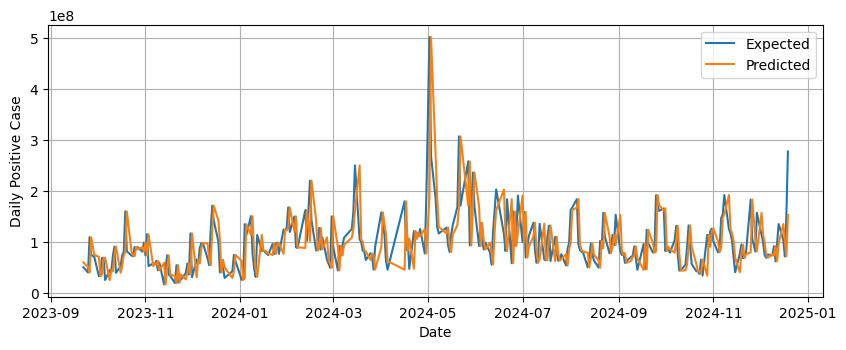

In [27]:
# evaluate persistence model on time series
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from math import sqrt
# prepare data
train = X

# load and prepare datasets
y = validation.values.astype('float32') # ambil dari cell sebelumnya no 15

# walk-forward validation
history = [x for x in train]
predictions = list()
for i in range(len(y)):
    # predict
    yhat = history[-1]
    predictions.append(yhat)
    # observation
    obs = y[i]
    history.append(obs)
    print('>Predicted=%.3f, Expected=%3.f' % (yhat, obs))

# report performance
rmse = sqrt(mean_squared_error(y, predictions))
mae = mean_absolute_error(y, predictions)
mape = mean_absolute_percentage_error(y, predictions)*100
print('RMSE: %.3f' % rmse)
print('MAE: %.3f' % mae)
print('MAPE: %.3f' % mape)

predictions_flat = np.array(predictions).reshape(-1)
y_reshaped = y.reshape(-1, 1)  # Reshape to a 2D array with one column
result = pd.DataFrame(np.array([y_reshaped.flatten(), predictions_flat]).T)
# result = pd.DataFrame(np.array([y[:,0],predictions_flat]).T)
val_date = validation.reset_index().iloc[:,[0]].rename(columns={0: "Date"})
result_date = pd.concat([val_date, result],axis=1).set_index('Date')
plt.style.use('default')
fig = plt.figure(figsize=(10, 4))
ax0 = fig.add_subplot(111)
ax0.plot(result_date)
ax0.grid()
fig.autofmt_xdate(rotation=0, ha='center')
ax0.set_xlabel('Date')
ax0.set_ylabel('Daily Positive Case')
ax0.legend(['Expected', 'Predicted'])
plt.show()